# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

In [4]:
!pwd

/home/aaron/github/maskrcnn-benchmark/demo


In [5]:
!ls ../configs/caffe2/

e2e_faster_rcnn_R_101_FPN_1x_caffe2.yaml
e2e_faster_rcnn_R_50_C4_1x_caffe2.yaml
e2e_faster_rcnn_R_50_FPN_1x_caffe2.yaml
e2e_faster_rcnn_X_101_32x8d_FPN_1x_caffe2.yaml
e2e_mask_rcnn_R_101_FPN_1x_caffe2.yaml
e2e_mask_rcnn_R_50_C4_1x_caffe2.yaml
e2e_mask_rcnn_R_50_FPN_1x_caffe2__aaron_10_imgs.yaml
e2e_mask_rcnn_R_50_FPN_1x_caffe2__aaron1.yaml
e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml
e2e_mask_rcnn_X_101_32x8d_FPN_1x_caffe2.yaml
e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x_caffe2.yaml


We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [6]:
# config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2__aaron1.yaml"
config_file = "/home/aaron/github/maskrcnn-benchmark/configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2__aaron_10_imgs.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [12]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

# patch Categories to my categories!
coco_demo.CATEGORIES = [
        "__background",
        "car",
        "license"
]

Let's define a few helper functions for loading images from a URL

In [8]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

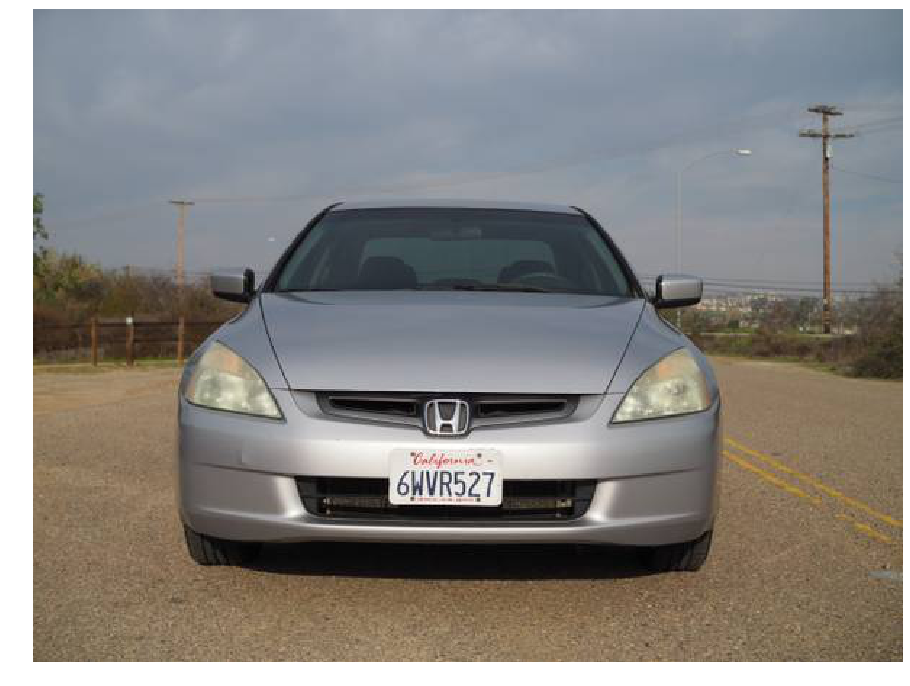

In [10]:
# from http://cocodataset.org/#explore?id=345434
image = load("https://i.imgur.com/DQ1FvQ1.jpg")
imshow(image)

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

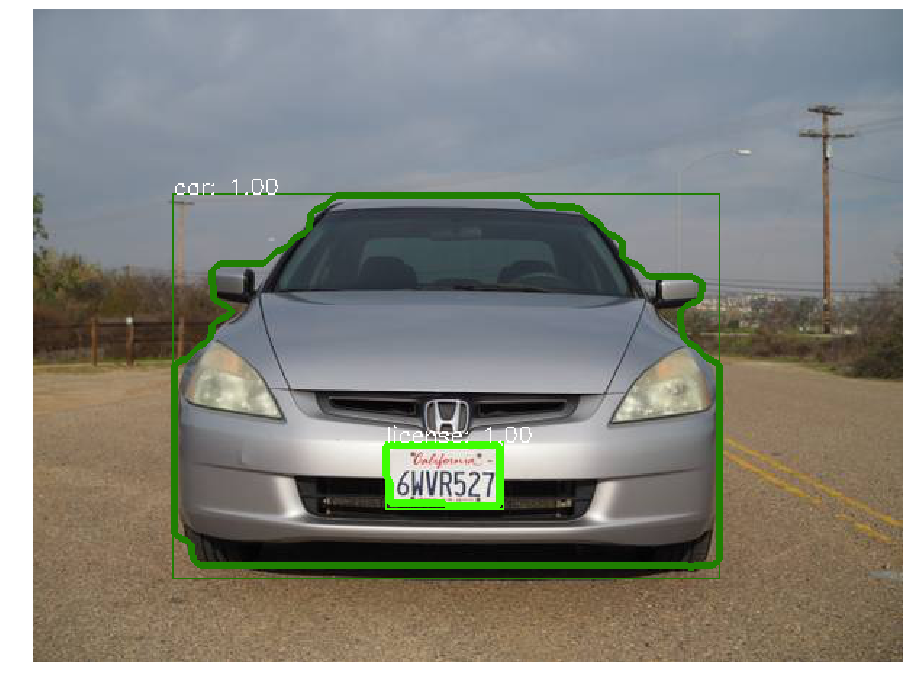

In [13]:
# compute predictions
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

In [14]:
# train on unknown examples

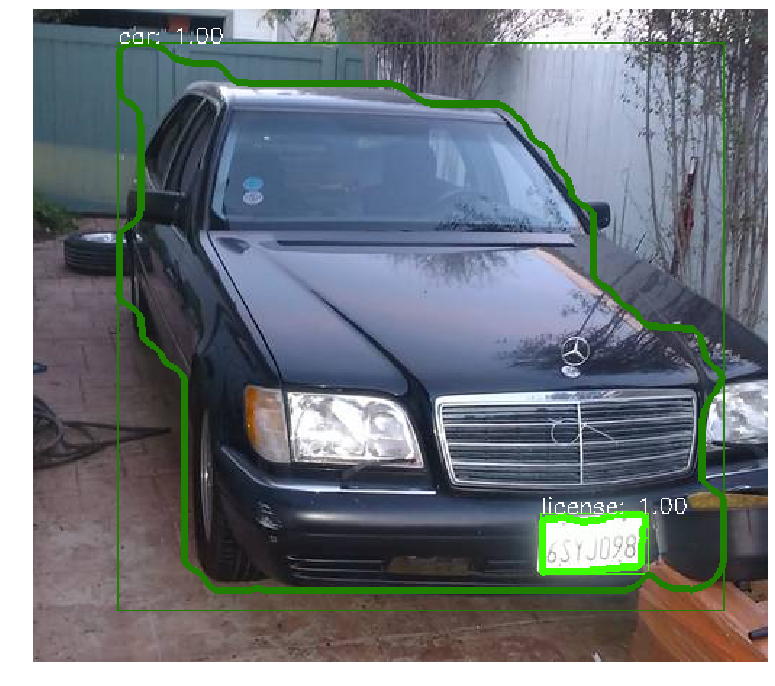

In [16]:
def show_via_url(url):
    image = load(url)
    predictions = coco_demo.run_on_opencv_image(image)
    imshow(predictions)
    
show_via_url("https://images.craigslist.org/00s0s_cYJtde0u439_600x450.jpg")

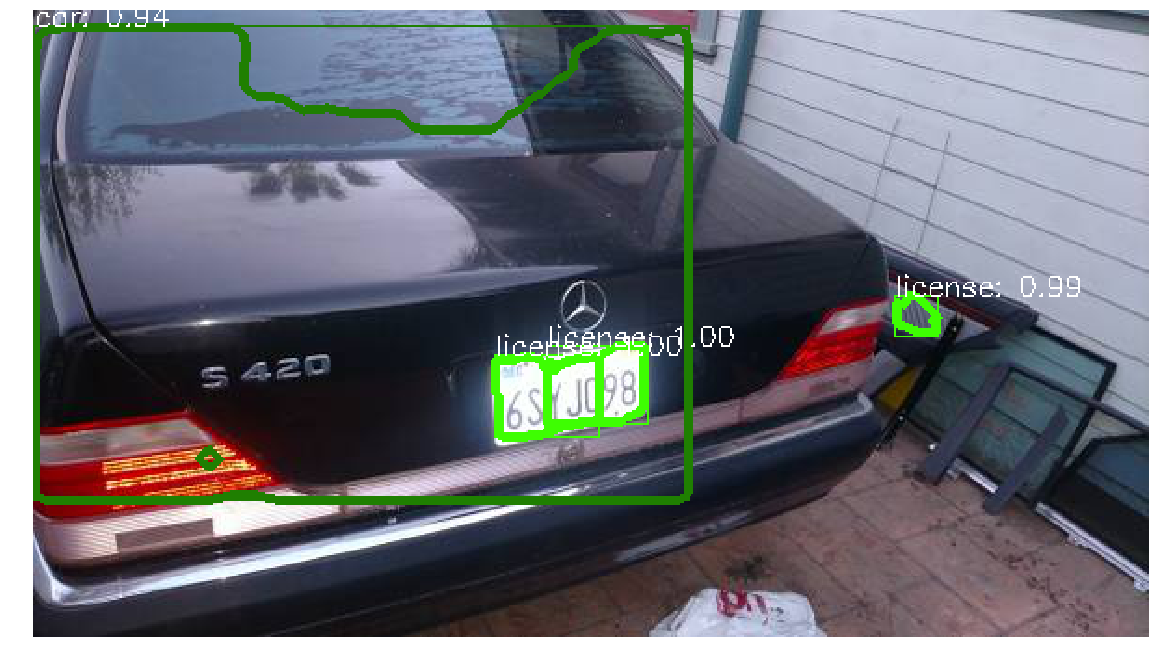

In [17]:
show_via_url('https://images.craigslist.org/00p0p_9YR8vpmLecj_600x450.jpg')

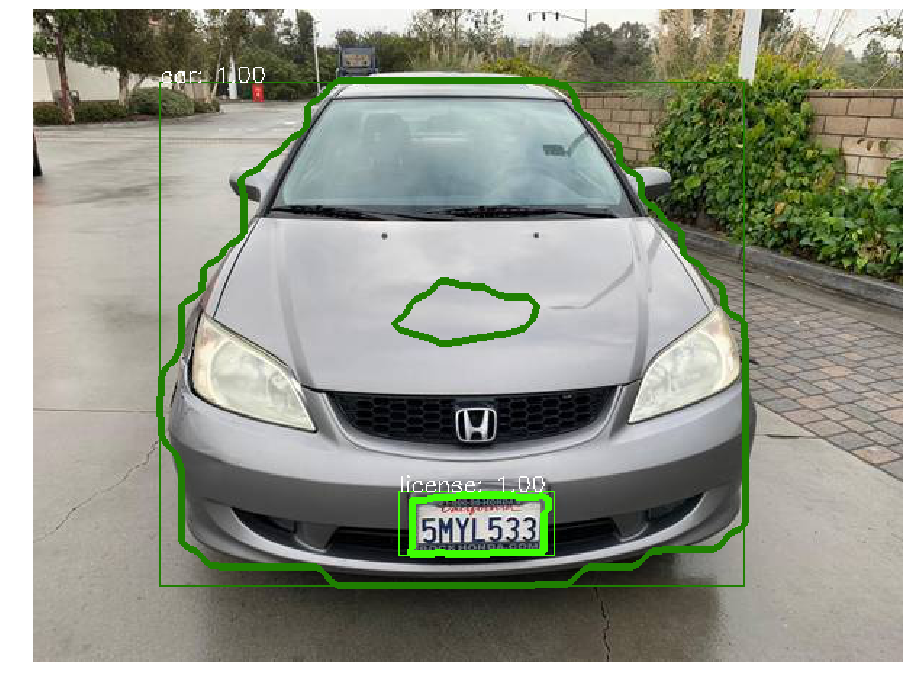

In [18]:
show_via_url('https://images.craigslist.org/00e0e_94Vd7PudcWH_600x450.jpg')

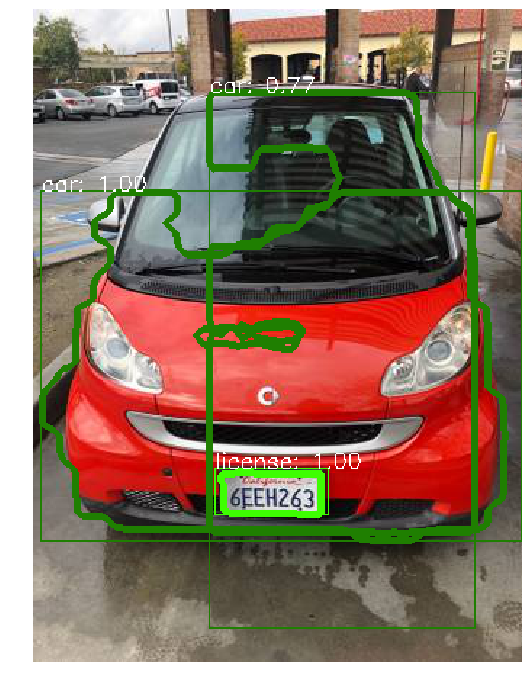

In [19]:
show_via_url('https://images.craigslist.org/00G0G_kYqYNaGjR0f_600x450.jpg')